In [1]:
#importanto bibliotecas
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
#aquisicao de dados
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

attributes = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'class']

df = pd.read_csv(url, names = attributes)

In [3]:
df.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#shape do dataset
df.shape

(150, 5)

In [5]:
#tipos de dados por coluna
df.dtypes

sepal_lenght    float64
sepal_width     float64
petal_lenght    float64
petal_width     float64
class            object
dtype: object

In [6]:
#descricao estatistica das variaveis numericas
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_lenght,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_lenght,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
#descricao estatistica das variaveis categoricas
df.describe(include = np.object)

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [8]:
#numero de registros por classe
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Graficos Univariados

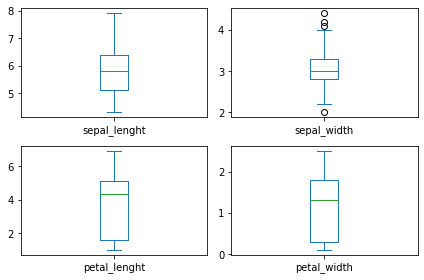

In [9]:
df.plot(kind = 'box', subplots = True, layout = (2,2))
plt.tight_layout()
plt.show()

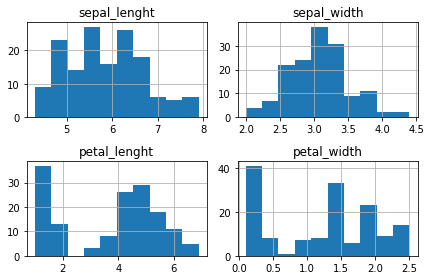

In [10]:
df.hist()
plt.tight_layout()
plt.show()

As variáveis <b>sepal_lenght</b> e <b>sepal_width</b> aparentemente possuem uma tendência à distribuição gaussiana

# Graficos multivariados

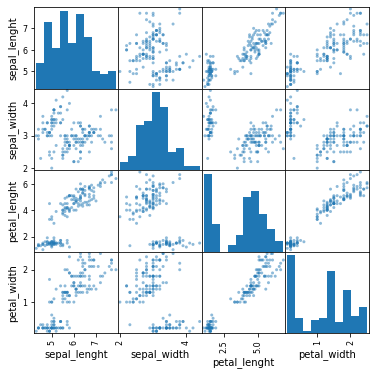

In [11]:
scatter_matrix(df, figsize = (6,6))
plt.show()

Note as tendências lineares das relações entre algumas variáveis. Estas tendências sugerem alta correlação linear de Pearson e portanto, previsibilidade.

# Separando conjunto de treino e teste

In [12]:
X = df.drop('class', axis = 1)
Y = df['class']

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [13]:
seed = 7

X_treino, X_validation, Y_treino, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = seed)

In [14]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'over')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

#avaliando cada modelo
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_treino, Y_treino, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: nan (nan)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [15]:
knn = KNeighborsClassifier()
knn.fit(X_treino, Y_treino)
predictions = knn.predict(X_validation)
print('Accuracy score:', accuracy_score(Y_validation, predictions))
print('\n\nClassification report:\n', classification_report(Y_validation, predictions))
print('\n\nConfusion Matrix\n', confusion_matrix(Y_validation, predictions))

Accuracy score: 0.9


Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Confusion Matrix
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
